In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv("crop-yield.csv")
data.head()


,crop,year,season,state,area,production,fertilizer,pesticide,yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,165500.63,539.09,0.420909


In [ ]:
data.info()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   crop        19689 non-null  object 
 1   year        19689 non-null  int64  
 2   season      19689 non-null  object 
 3   state       19689 non-null  object 
 4   area        19689 non-null  float64
 5   production  19689 non-null  int64  
 6   fertilizer  19689 non-null  float64
 7   pesticide   19689 non-null  float64
 8   yield       19689 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 1.4+ MB


,0
crop,0
year,0
season,0
state,0
area,0
production,0
fertilizer,0
pesticide,0
yield,0


In [ ]:
data = data.dropna()


In [ ]:
le = LabelEncoder()

data['crop'] = le.fit_transform(data['crop'])
data['season'] = le.fit_transform(data['season'])
data['state'] = le.fit_transform(data['state'])

In [ ]:
scaler = StandardScaler()

cols = ['area','fertilizer','pesticide','production'] # Corrected column names

data[cols] = scaler.fit_transform(data[cols])

In [ ]:
X = data.drop('yield', axis=1)
y = data['yield']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2:", r2)


MSE: 72571.78507763556
R2: 0.9094256436105408


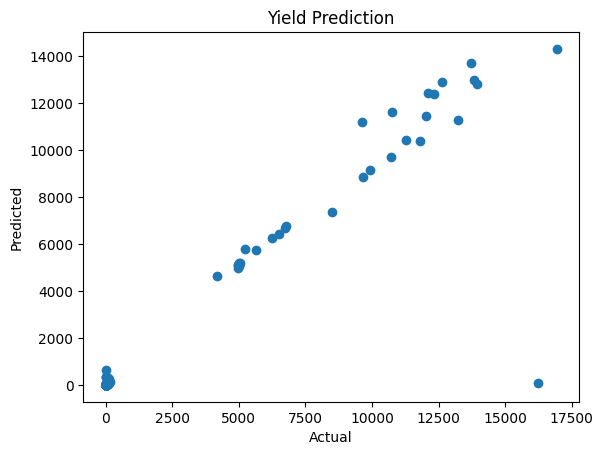

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Yield Prediction")
plt.show()


In [ ]:
import pandas as pd

# Define the single sample data based on X's features and order
# X's columns are: 'crop', 'year', 'season', 'state', 'area', 'production', 'fertilizer', 'pesticide'
# Values for 'crop', 'season', 'state' are assumed to be already label-encoded
# Values for 'year' are not scaled
# Values for 'area', 'production', 'fertilizer', 'pesticide' need to be scaled
sample_data_raw = {
    'crop': [2],
    'year': [2024],
    'season': [1],
    'state': [5],
    'area': [1.5],
    'production': [4.5], # This production value will be scaled
    'fertilizer': [250],
    'pesticide': [40]
}

# Create a DataFrame for the sample
sample_df = pd.DataFrame(sample_data_raw, columns=X.columns)

# Apply scaling to the numerical features (using the pre-fitted scaler)
# Use the 'cols' variable directly to ensure consistent column order with how the scaler was fitted
sample_df[cols] = scaler.transform(sample_df[cols])

print("Future Yield:", model.predict(sample_df))

Future Yield: [17.2243]


In [ ]:
importances = model.feature_importances_
features = X.columns

imp = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

imp.sort_values(by='Importance', ascending=False)


,Feature,Importance
5,production,0.727497
4,area,0.089263
7,pesticide,0.060260
6,fertilizer,0.050266
3,state,0.038488
0,crop,0.026324
1,year,0.005223
2,season,0.002679
